___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

## Getting the Data

In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import yfinance as yf
%matplotlib inline

## Data

We need to get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [52]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2024, 1, 1)

In [27]:
# Bank of America
BAC = yf.download("BAC", start=start, end=end)

# CitiGroup
C = yf.download("C", start=start, end=end)

# Goldman Sachs
GS = yf.download("GS", start=start, end=end)

# JPMorgan Chase
JPM = yf.download("JPM", start=start, end=end)

# Morgan Stanley
MS = yf.download("MS", start=start, end=end)

# Wells Fargo
WFC = yf.download("WFC", start=start, end=end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [53]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [54]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [55]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [56]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2020-01-02   35.349998  35.660000  35.290001  35.639999  32.048058  37614200   
2020-01-03   34.980000  35.150002  34.759998  34.900002  31.382639  50357900   
2020-01-06   34.410000  34.900002  34.369999  34.849998  31.337683  42185000   
2020-01-07   34.700001  34.919998  34.529999  34.619999  31.130859  34149000   
2020-01-08   34.570000  35.189999  34.549999  34.970001  31.445583  45311600   

Bank Ticker          C                                   ...         MS  \
Stock Info        Open       High        Low      Close  ...        Low   
Date                                                     ...              
2020-01-02   80.129997  81.260002  80.029999  81.230003  ...  51.169998   
2020-01-03   79.800003  80.519997  79.449997  79.699997  ...  50.830002   
2020-01-06   78.720001  79.550003  78.720001  79.449997  ...  50.459999   
2020-01-07   79.290001  79.300003  78.730003  78.760002  ...  50.709999   
2020-01-08   78.769997  80.000000  78.680000  79.360001  ...  50.900002   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2020-01-02   52.040001  45.443264  7808000  53.849998  54.040001  53.509998   
2020-01-03   51.200001  44.709743  6706000  53.110001  53.619999  52.900002   
2020-01-06   51.020000  44.552559  7476700  52.740002  53.200001  52.720001   
2020-01-07   50.919998  44.465233  4538100  53.049999  53.049999  52.470001   
2020-01-08   51.570000  45.032841  6185200  52.840000  53.330002  52.799999   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2020-01-02   53.750000  47.959930  16803100  
2020-01-03   53.419998  47.665462  15608800  
2020-01-06   53.099998  47.379944  13200300  
2020-01-07   52.660000  46.987343  13278600  
2020-01-08   52.820000  47.130108  16585600  

[5 rows x 36 columns]

# EDA

In [57]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     49.380001
C       81.910004
GS     423.850006
JPM    171.779999
MS     108.730003
WFC     59.060001
dtype: float64

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [58]:
returns = pd.DataFrame()

In [59]:
for tick in tickers:
    returns[tick + 'Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.020763,-0.018835,-0.011693,-0.019491,-0.016141,-0.006140
2020-01-06,-0.001433,-0.003137,0.010234,-0.000795,-0.003516,-0.005990
2020-01-07,-0.006600,-0.008685,0.006583,-0.017001,-0.001960,-0.008286
2020-01-08,0.010110,0.007618,0.009639,0.007801,0.012765,0.003038


c:\Users\barna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\barna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\barna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\barna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\barna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

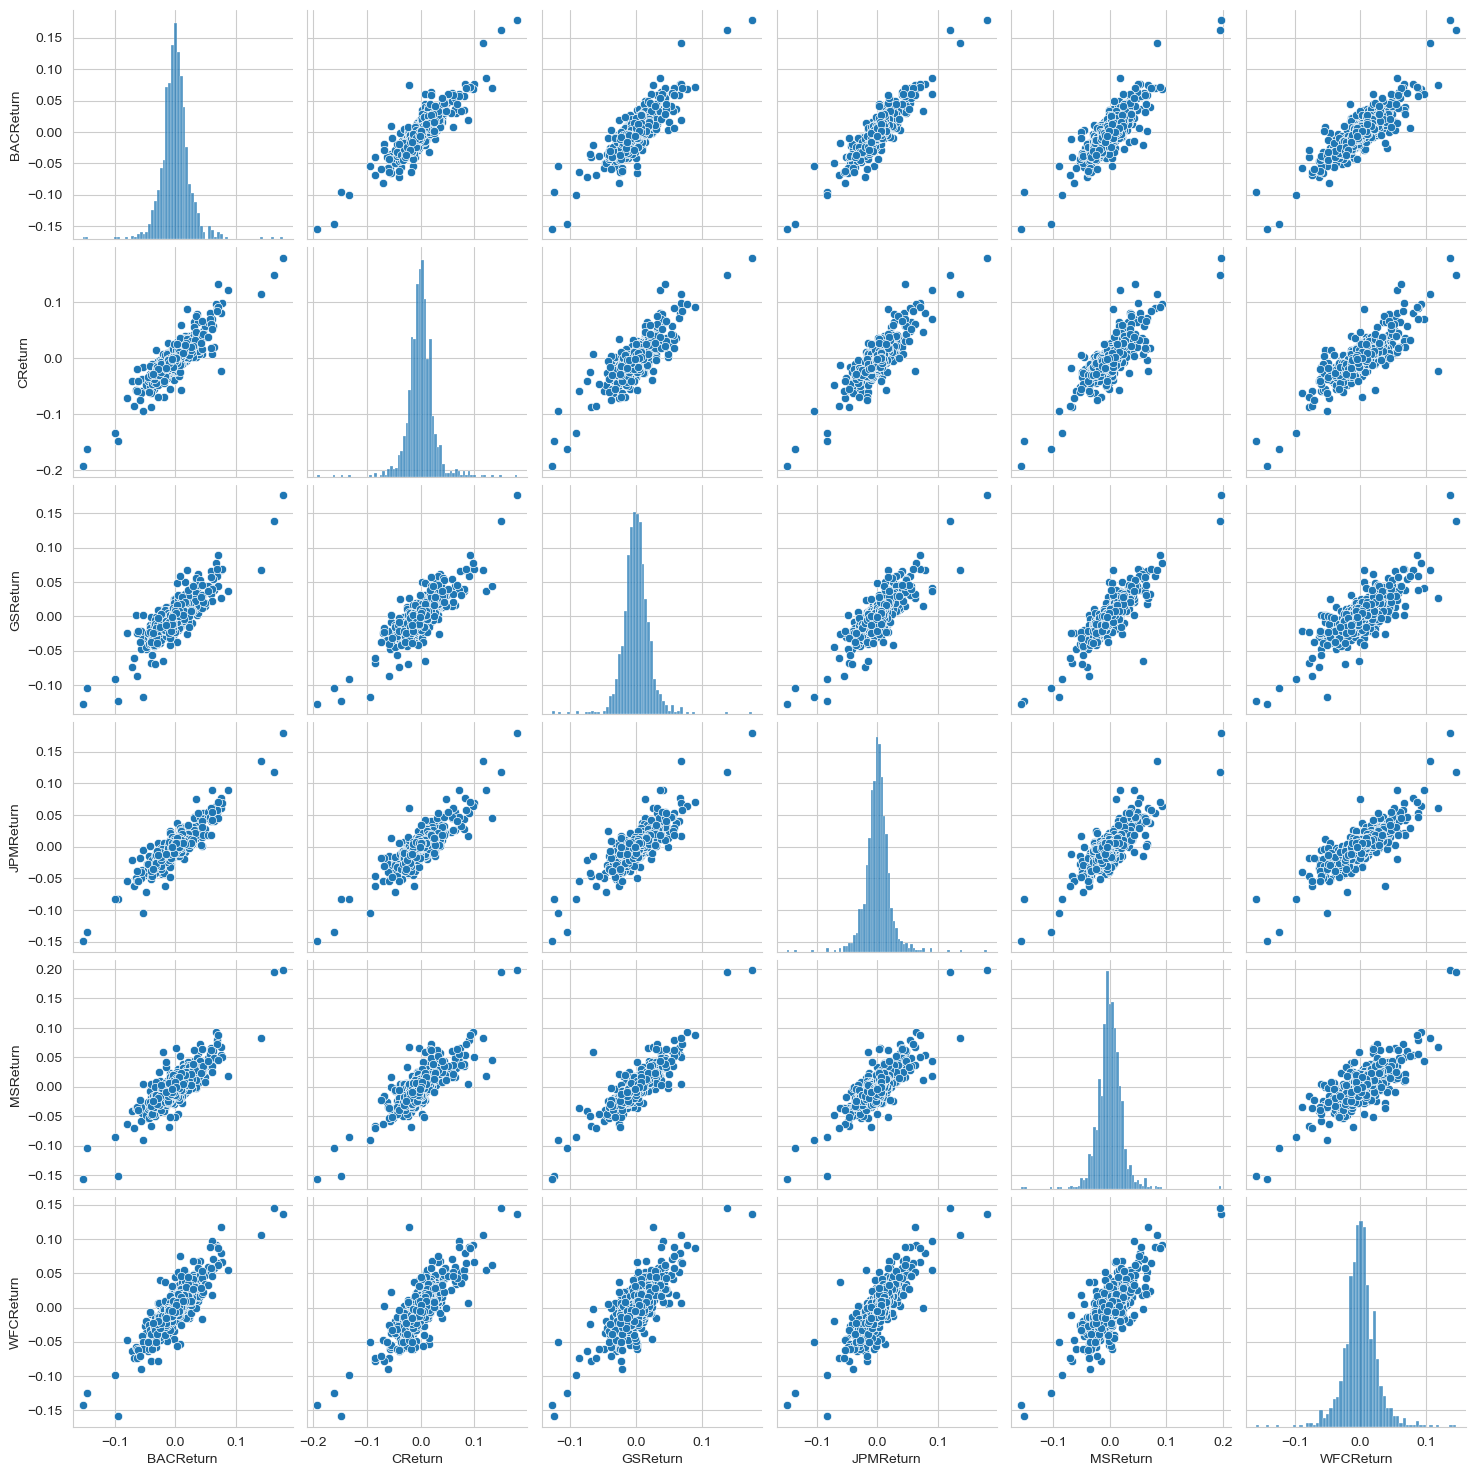

In [60]:
import seaborn as sns

sns.pairplot(returns)

In [61]:
returns.idxmin()

BACReturn   2020-03-16
CReturn     2020-03-16
GSReturn    2020-03-16
JPMReturn   2020-03-16
MSReturn    2020-03-16
WFCReturn   2020-03-12
dtype: datetime64[ns]

In [63]:
returns.std()

BACReturn    0.024153
CReturn      0.026358
GSReturn     0.021897
JPMReturn    0.021724
MSReturn     0.023742
WFCReturn    0.026044
dtype: float64

In [64]:
returns.loc['2020-01-01':'2024-01-01'].std()

BACReturn    0.024153
CReturn      0.026358
GSReturn     0.021897
JPMReturn    0.021724
MSReturn     0.023742
WFCReturn    0.026044
dtype: float64

________________________________________________________________
**Histplot of 2020-2024 returns for Morgan Stanley**

c:\Users\barna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='MSReturn', ylabel='Count'>

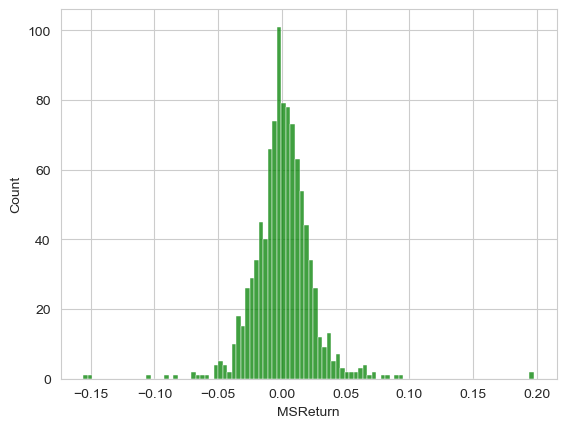

In [66]:
sns.histplot(returns.loc['2020-01-01':'2024-01-01']['MSReturn'],color='green',bins=100)

**Histplot of the 2020-2024 returns for CitiGroup**

c:\Users\barna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='CReturn', ylabel='Count'>

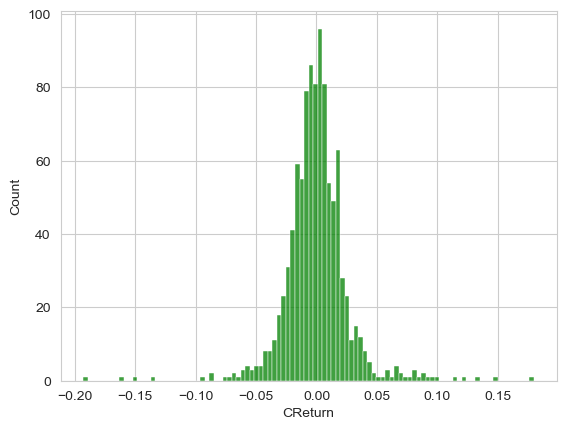

In [67]:
sns.histplot(returns.loc['2020-01-01':'2024-01-01']['CReturn'],color='green',bins=100)

____
# Visualization


### Imports

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


import plotly
import cufflinks as cf
cf.go_offline()

**Line plot showing Close price for each bank for the entire index of time**

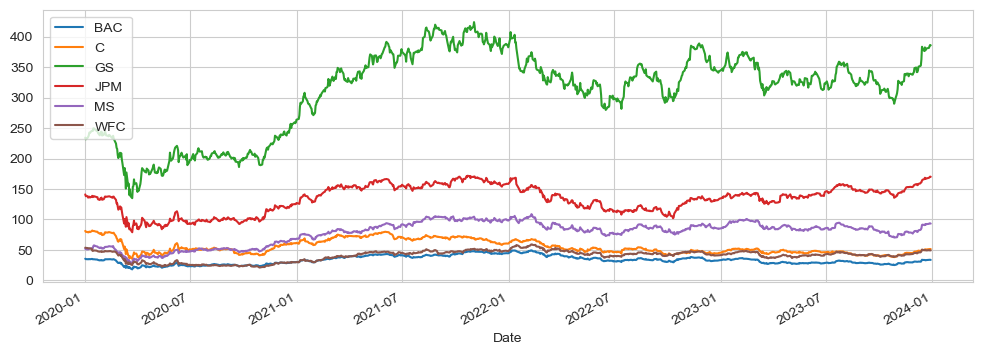

In [69]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

In [71]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

________________________
## Moving Averages

c:\Users\barna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\barna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\barna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\barna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



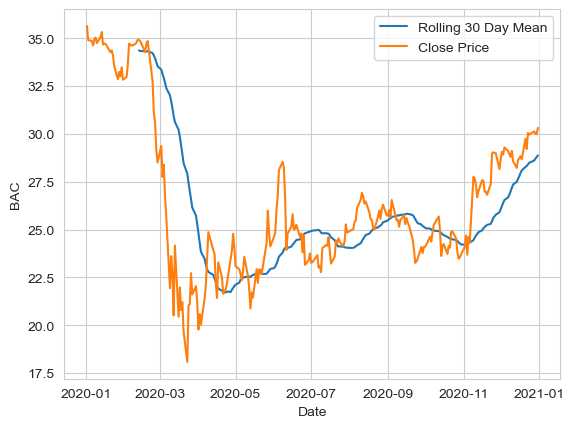

In [72]:
sns.lineplot(data=bank_stocks.xs('Close',axis=1,level='Stock Info')['BAC'].loc[:'2020'].rolling(30).mean(),label='Rolling 30 Day Mean')
sns.lineplot(data=bank_stocks.xs('Close',axis=1,level='Stock Info')['BAC'].loc[:'2020'],label='Close Price')
plt.legend()

**Heatmap of the correlation between the stocks Close Price.**

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

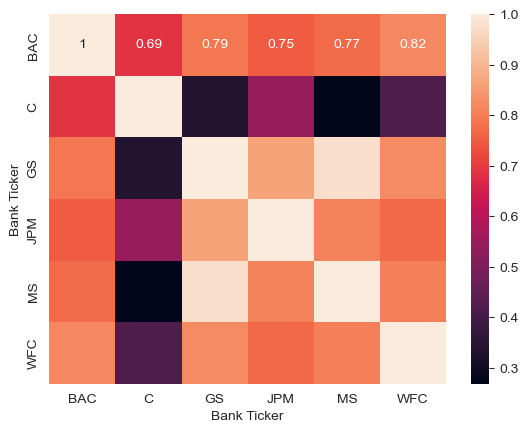

In [73]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

**Clustering the correlations together:**

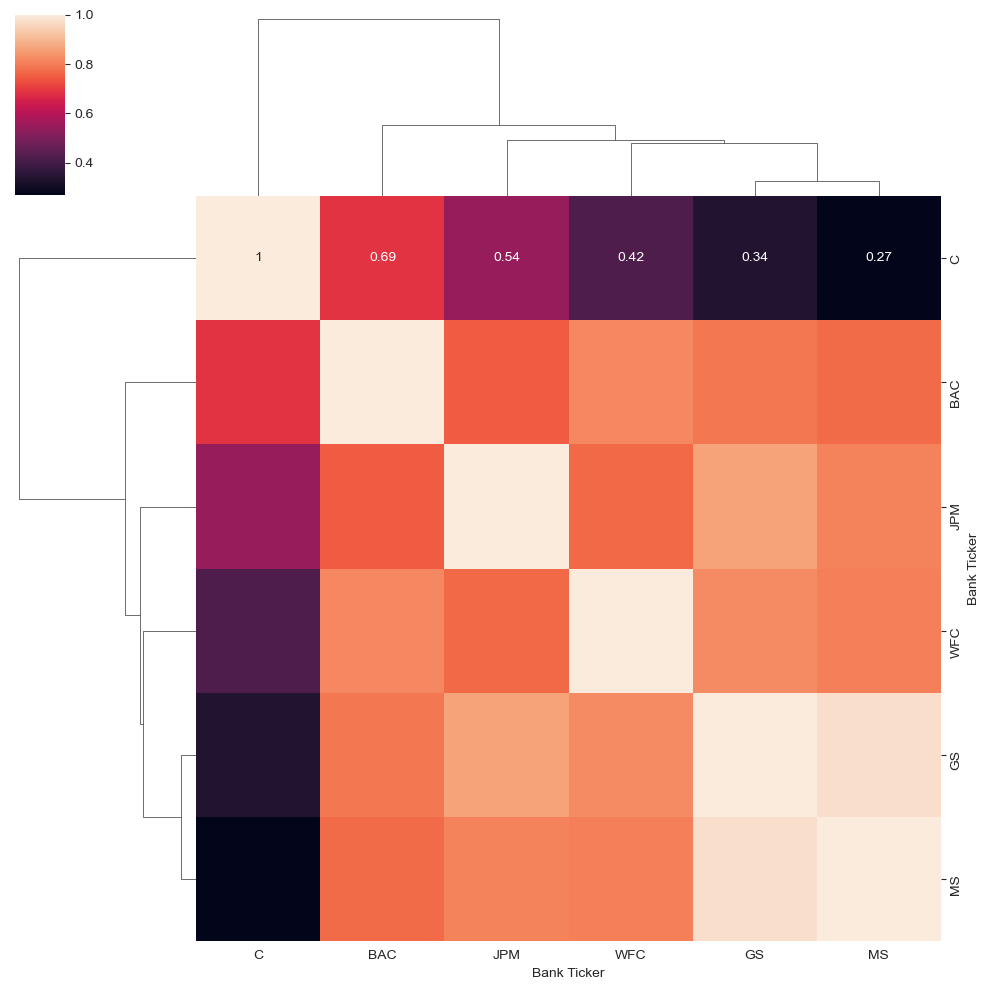

In [74]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [75]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

**Candle plot of Bank of America's stock from Jan 1st 2020 to Jan 1st 2021.**

In [78]:
BAC[['Open','High', 'Low', 'Close']].loc['2020-01-01':'2020-12-31'].iplot(kind='candle')

**Simple Moving Averages plot of Morgan Stanley for the year 2020.**

In [79]:
MS['Close'].loc['2020-01-01':'2021-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Morgan Stanley SMA')

**Bollinger Band Plot for Bank of America for the year 2020**

In [80]:
BAC['Close'].loc['2020-01-01':'2021-01-01'].ta_plot(study='boll',title='Bank of America BBP')